In [5]:
import pandas as pd
import FinanceDataReader as fdr


In [6]:
df_kos = fdr.StockListing('KOSPI')
df_kos

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,61300,2,-700,-1.13,62300,62600,61300,10308143,638634052687,365947670315000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,511000,1,4000,0.79,508000,522000,507000,239646,123155230000,119574000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,91000,2,-1700,-1.83,93500,94000,91000,2496352,230723303704,66248215215000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,783000,2,-6000,-0.76,789000,790000,781000,39167,30725679000,55729242000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,669000,1,1000,0.15,668000,686000,666000,145162,97814598000,47226277467000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,002785,KR7002781003,진흥기업우B,KOSPI,,5060,2,-100,-1.94,5200,5240,5060,1283,6632000,4337523080,857218,STK
939,001527,KR7001522002,동양2우B,KOSPI,,13070,1,10,0.08,13140,13190,13070,1685,22033440,4032996830,308569,STK
940,001525,KR7001521004,동양우,KOSPI,,6520,2,-30,-0.46,6560,6560,6500,4180,27190520,4027606120,617731,STK
941,002787,KR7002782001,진흥기업2우B,KOSPI,,13630,1,90,0.66,13540,13630,13540,193,2621020,4018233040,294808,STK


In [7]:
df_kos[['Marcap','Stocks']].describe()

,Marcap,Stocks
count,9.430000e+02,9.430000e+02
mean,2.031425e+12,6.717128e+07
std,1.345847e+13,2.237780e+08
min,3.013632e+09,1.098520e+05
25%,8.881822e+10,1.041226e+07
50%,2.255479e+11,2.719508e+07
75%,7.239549e+11,6.130395e+07
max,3.659477e+14,5.969783e+09


In [8]:
df_kos['Name'][df_kos['Marcap']== 3013632000]

942    흥국화재2우B
Name: Name, dtype: object

In [9]:
kos_list=df_kos[(df_kos['Marcap'] ==0) | (df_kos['Marcap'] <= 8.978561e+10) |(df_kos['Stocks'] <= 1.041226e+07)] .index
df_kos.drop(kos_list,axis='index',inplace=True)


In [10]:
df_kos_code=df_kos['Code'].to_frame()


In [11]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

KR = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
KR['Code'] = KR['종목코드'].apply(make_code)
KR_list_1 = KR[KR['상장일'] < '2000-01-01']['Code'].to_frame()
KR_list_2 = KR[(KR['상장일'] >= '2000-01-01') & (KR['상장일'] < '2007-01-01')]['Code'].to_frame()
KR_list_3 = KR[(KR['상장일'] >= '2007-01-01') & (KR['상장일'] < '2015-06-15')]['Code'].to_frame()
KR_list_4 = KR[KR['상장일'] >= '2015-06-15']['Code'].to_frame()


In [12]:
df_kr_1 = pd.concat([df_kos_code,KR_list_1])
df_kr_2 = pd.concat([df_kos_code,KR_list_2])
df_kr_3 = pd.concat([df_kos_code,KR_list_3])
df_kr_4 = pd.concat([df_kos_code,KR_list_4])


In [13]:
df_kr1=df_kr_1[df_kr_1.duplicated()]
df_kr2=df_kr_2[df_kr_2.duplicated()]
df_kr3=df_kr_3[df_kr_3.duplicated()]
df_kr4=df_kr_4[df_kr_4.duplicated()]

In [14]:
kr1=[]
kr2=[]
kr3=[]
kr4=[]

In [15]:
from tqdm import tqdm
import time


for i in range(len(df_kr1)):
    df=pd.DataFrame
    kr1.append(df)

for i in range(len(df_kr2)):
    df=pd.DataFrame
    kr2.append(df) 

for i in range(len(df_kr3)):
    df=pd.DataFrame
    kr3.append(df)  

for i in range(len(df_kr4)):
    df=pd.DataFrame
    kr4.append(df)     


In [16]:
for i in range(len(df_kr1)):
    kr1[i] = fdr.DataReader(df_kr1.iat[i,0],'1980')
    kr1[i]['Code'] =df_kr1.iat[i,0]



In [17]:
for i in range(len(df_kr2)):
    kr2[i] = fdr.DataReader(df_kr2.iat[i,0],'2000')
    kr2[i]['Code'] =df_kr2.iat[i,0]

In [18]:
for i in range(len(df_kr3)):
    kr3[i] = fdr.DataReader(df_kr3.iat[i,0],'2007')
    kr3[i]['Code'] =df_kr3.iat[i,0]
    

In [19]:
for i in range(len(df_kr4)):
    kr4[i] = fdr.DataReader(df_kr4.iat[i,0],'2015-6-15')
    kr4[i]['Code'] =df_kr4.iat[i,0]

In [20]:
df_Kr1 = pd.DataFrame(kr1) ## 2000년 이전 상장기업 1980년도부터 주가데이터
df_Kr2 = pd.DataFrame(kr2) ## 2000년~2007년 상장기업 2000년부터 주가데이터
df_Kr3 = pd.DataFrame(kr3) ## 2007년~2015년 상장기업 2007년부터 주가데이터
df_Kr4 = pd.DataFrame(kr4) ## 2015년~ 상장기업 2015년부터 주가데이터


c:\Users\jhm21\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

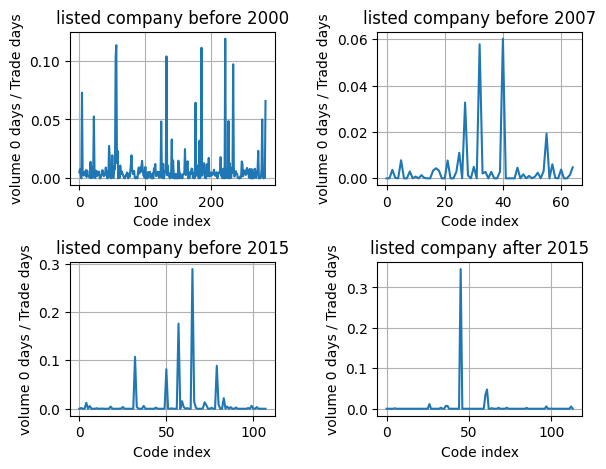

In [22]:
kr_ft_V_1 =[]
kr_ft_V_2 =[]
kr_ft_V_3 =[]
kr_ft_V_4 = []
kr_ft_V =[]
for i in range(len(df_kr1)):
    kr_ft_V_1.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))

kr_ft_V_1=pd.DataFrame(kr_ft_V_1)

for i in range(len(df_kr2)):
    kr_ft_V_2.append((len(kr2[i][kr2[i]['Volume']==0])/len(kr2[i])))
    
kr_ft_V_2 = pd.DataFrame(kr_ft_V_2)    
for i in range(len(df_kr3)):
    kr_ft_V_3.append((len(kr3[i][kr3[i]['Volume']==0])/len(kr3[i])))
kr_ft_V_3 = pd.DataFrame(kr_ft_V_3)    

for i in range(len(df_kr4)):
    kr_ft_V_4.append((len(kr4[i][kr4[i]['Volume']==0])/len(kr4[i])))
kr_ft_V_4 = pd.DataFrame(kr_ft_V_4)  

kr_ft_V = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4])
kr_ft_V_d = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4],axis=1)
kr_ft_V=kr_ft_V.reset_index().iloc[:,[1]]
plt.subplot(2, 2, 1)
plt.plot(kr_ft_V_1)
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(kr_ft_V_2)
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(kr_ft_V_3)
plt.title('listed company before 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(kr_ft_V_4)
plt.title('listed company after 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

In [23]:
kr_ft_V_d.describe()

,0,0,0,0
count,283.000000,65.000000,108.000000,114.000000
mean,0.008219,0.004089,0.008311,0.004185
std,0.017700,0.011034,0.035477,0.032722
min,0.000000,0.000000,0.000000,0.000000
25%,0.000510,0.000000,0.000000,0.000000
50%,0.003667,0.000179,0.000000,0.000000
75%,0.007417,0.003163,0.001484,0.000000
max,0.118500,0.060163,0.288779,0.345282


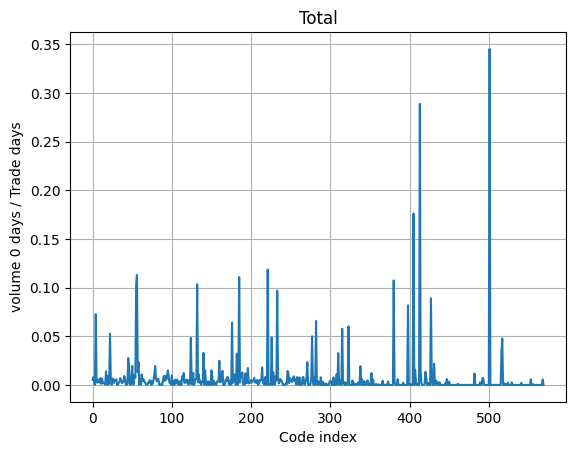

In [24]:
plt.plot(kr_ft_V)
plt.title('Total')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()
plt.show()


In [25]:
## 상장 기업별 특이값제거 
index1 = kr_ft_V_1[kr_ft_V_1[0]>= 0.04].index
index2 = kr_ft_V_2[kr_ft_V_2[0] >= 0.018].index
index3 = kr_ft_V_3[kr_ft_V_3[0]>= 0.05].index
index4 = kr_ft_V_4[kr_ft_V_4[0]>= 0.03].index


In [26]:
df_Kr1.drop(index1 ,axis='index', inplace=True)
df_Kr2.drop(index2 ,axis='index', inplace=True)
df_Kr3.drop(index3 ,axis='index', inplace=True)
df_Kr4.drop(index4 ,axis='index', inplace=True) 

In [27]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

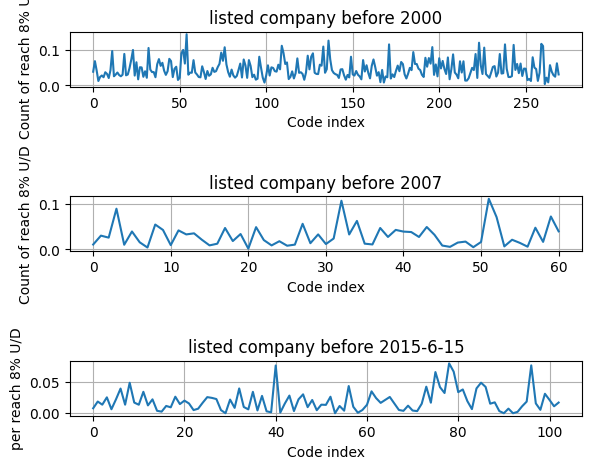

In [28]:
kr_ft_15_TB_1 =[]
kr_ft_15_TB_2 =[]
kr_ft_15_TB_3 =[]
kr_ft_15_TB =[]

for i in range(len(df_Kr1)):
    kr_ft_15_TB_1.append(len(df_Kr1[0][i].loc[:'2015-6-15'][(df_Kr1[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr1[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr1[0][i].loc[:'2015-6-15']))

for i in range(len(df_Kr2)):
    kr_ft_15_TB_2.append(len(df_Kr2[0][i].loc[:'2015-6-15'][(df_Kr2[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr2[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr2[0][i].loc[:'2015-6-15']))

for i in range(len(df_Kr3)):
    kr_ft_15_TB_3.append(len(df_Kr3[0][i].loc[:'2015-6-15'][(df_Kr3[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr3[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr3[0][i].loc[:'2015-6-15']))

kr_ft_15_TB = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)])
kr_ft_15_TB_d = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)],axis=1)
plt.subplot(3, 1, 1)  
plt.plot(pd.DataFrame(kr_ft_15_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 2)  
plt.plot(pd.DataFrame(kr_ft_15_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 3)  
plt.plot(pd.DataFrame(kr_ft_15_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('per reach 8% U/D')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    


In [29]:
kr_ft_15_TB_1=pd.DataFrame(kr_ft_15_TB_1)
kr_ft_15_TB_2=pd.DataFrame(kr_ft_15_TB_2)
kr_ft_15_TB_3=pd.DataFrame(kr_ft_15_TB_3)

In [30]:
kr_ft_15_TB_d.describe()

,0,0,0
count,270.000000,61.000000,103.000000
mean,0.045581,0.030123,0.019470
std,0.025596,0.023992,0.017046
min,0.003868,0.001744,0.000000
25%,0.027351,0.011830,0.006389
50%,0.038499,0.023869,0.015385
75%,0.058662,0.041623,0.025886
max,0.142544,0.110643,0.078810


In [31]:
index5 = kr_ft_15_TB_1[kr_ft_15_TB_1[0]> 0.09].index
index6 = kr_ft_15_TB_2[kr_ft_15_TB_2[0] >0.09].index


In [32]:
df_Kr1.drop(index5 ,axis='index', inplace=True)
df_Kr2.drop(index6 ,axis='index', inplace=True)


In [33]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)


<Axes: >

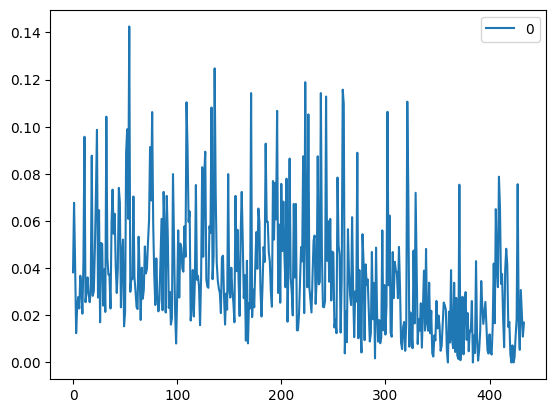

In [34]:
kr_ft_15_TB=kr_ft_15_TB.reset_index().iloc[:,[1]]
kr_ft_15_TB.plot()

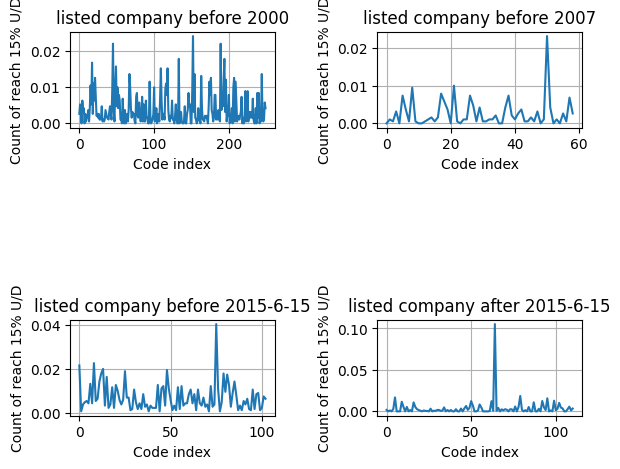

In [35]:
kr_ft_23_TB_1 =[]
kr_ft_23_TB_2 =[]
kr_ft_23_TB_3 =[]
kr_ft_23_TB_4=[]
kr_ft_23_TB = []

for i in range(len(df_Kr1)):
    kr_ft_23_TB_1.append(len(df_Kr1[0][i].loc['2015-6-15':][(df_Kr1[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr1[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr1[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr2)):
    kr_ft_23_TB_2.append(len(df_Kr2[0][i].loc['2015-6-15':][(df_Kr2[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr2[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr2[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr3)):
    kr_ft_23_TB_3.append(len(df_Kr3[0][i].loc['2015-6-15':][(df_Kr3[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr3[0][i].loc['2015-6-15':]['Change']< -0.08)])/len(df_Kr3[0][i].loc['2015-6-15':]))


for i in range(len(df_Kr4)):
    kr_ft_23_TB_4.append(len(df_Kr4[0][i].loc['2015-6-15':][(df_Kr4[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr4[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr4[0][i].loc['2015-6-15':]))

kr_ft_23_TB = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)])
kr_ft_23_TB_d = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)],axis=1)

plt.subplot(2, 2, 1)  
plt.plot(pd.DataFrame(kr_ft_23_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(pd.DataFrame(kr_ft_23_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(pd.DataFrame(kr_ft_23_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(pd.DataFrame(kr_ft_23_TB_4))
plt.title('listed company after 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    



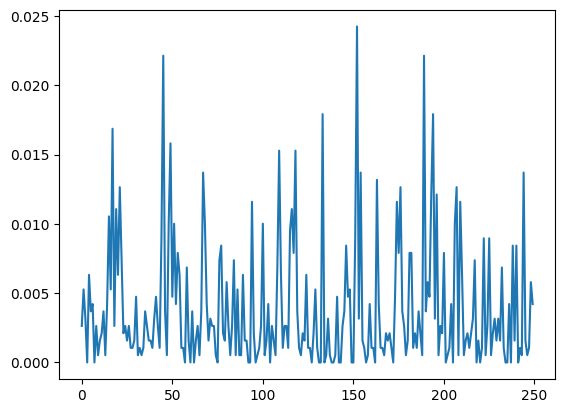

In [36]:
plt.plot(kr_ft_23_TB_1)

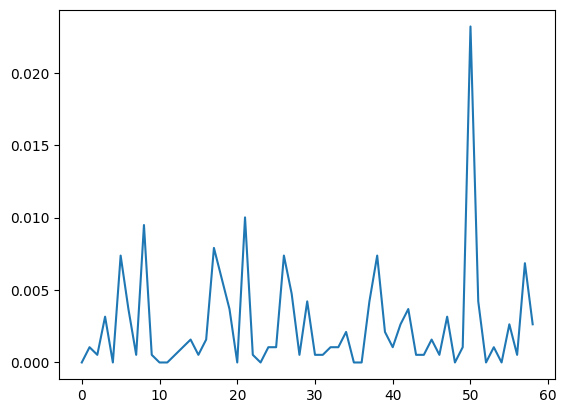

In [37]:
plt.plot(kr_ft_23_TB_2)

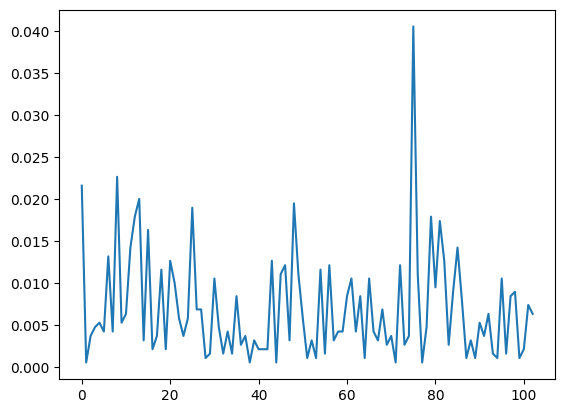

In [38]:
plt.plot(kr_ft_23_TB_3)

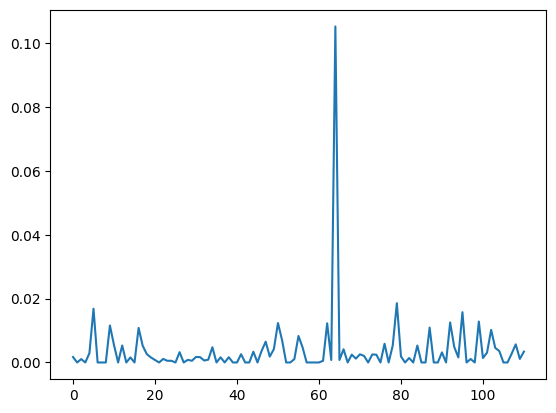

In [39]:
plt.plot(kr_ft_23_TB_4)

In [40]:
df_Kr3[0][75]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2007-11-01,64396,68703,54757,54758,398795,NaN,093230
2007-11-02,52911,60705,52296,54347,151375,-0.007506,093230
2007-11-05,57013,60089,54552,57629,61036,0.060390,093230
2007-11-06,57218,59884,56398,57014,44941,-0.010672,093230
2007-11-07,57423,57628,53937,54553,34641,-0.043165,093230
...,...,...,...,...,...,...,...
2023-02-20,889,889,870,879,255479,0.001139,093230
2023-02-21,872,885,871,875,251321,-0.004551,093230
2023-02-22,874,874,851,852,434689,-0.026286,093230


In [41]:
kr_ft_23_TB_1=pd.DataFrame(kr_ft_23_TB_1)
kr_ft_23_TB_2=pd.DataFrame(kr_ft_23_TB_2)
kr_ft_23_TB_3=pd.DataFrame(kr_ft_23_TB_3)
kr_ft_23_TB_4=pd.DataFrame(kr_ft_23_TB_4)

In [42]:
df_Kr4[0][63]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2017-12-05,28450,29350,21750,22700,1390347,NaN,281820
2017-12-06,22800,24600,22500,23200,412734,0.022026,281820
2017-12-07,23150,24400,22600,24400,190904,0.051724,281820
2017-12-08,24200,24300,22600,23000,174607,-0.057377,281820
2017-12-11,22500,23100,21750,22000,177474,-0.043478,281820
...,...,...,...,...,...,...,...
2023-02-20,18160,18400,17950,18350,15726,0.003829,281820
2023-02-21,18350,18350,17870,17990,26293,-0.019619,281820
2023-02-22,17500,17850,17500,17800,14289,-0.010561,281820


In [43]:
kr_ft_23_TB_d.describe()

,0,0,0,0
count,250.000000,59.000000,103.000000,111.000000
mean,0.003903,0.002600,0.007012,0.003754
std,0.004482,0.003768,0.006367,0.010518
min,0.000000,0.000000,0.000527,0.000000
25%,0.001054,0.000527,0.002636,0.000000
50%,0.002109,0.001054,0.004744,0.001401
75%,0.005271,0.003690,0.010543,0.003881
max,0.024249,0.023195,0.040590,0.105263


In [44]:
index7 = kr_ft_23_TB_1[kr_ft_23_TB_1[0]> 0.01].index
index8 = kr_ft_23_TB_2[kr_ft_23_TB_2[0] >0.005].index
index9 = kr_ft_23_TB_3[kr_ft_23_TB_3[0]> 0.01].index
index10 = kr_ft_23_TB_4[kr_ft_23_TB_4[0] >0.015].index


In [45]:
df_Kr1.drop(index7 ,axis='index', inplace=True)
df_Kr2.drop(index8 ,axis='index', inplace=True)
df_Kr3.drop(index9 ,axis='index', inplace=True)
df_Kr4.drop(index10 ,axis='index', inplace=True) 

In [46]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

In [47]:
df_dollar = fdr.DataReader('USD/KRW','1998-11-13 00:00:00')


In [48]:
kr_ft_DW_1 =[]
kr_ft_DW_2 =[]
kr_ft_DW_3 =[]
kr_ft_DW_4=[]

for i in range(len(df_Kr1)):
    a=(df_Kr1[0][i].iloc[-1]['Close']-df_Kr1[0][i].iloc[0]['Close'])/ df_Kr1[0][i].iloc[-1]['Close']
    b=(df_dollar.iloc[-1]['Close']-df_dollar.iloc[0]['Close'])/df_dollar.iloc[0]['Close']
    kr_ft_DW_1.append(a<b)
    
    
for i in range(len(df_Kr2)):
    a=(df_Kr2[0][i].iloc[-1]['Close']-df_Kr2[0][i].iloc[0]['Close'])/ df_Kr2[0][i].iloc[-1]['Close']
    b=(df_dollar.iloc[-1]['Close']-df_dollar.iloc[0]['Close'])/df_dollar.iloc[0]['Close']
    kr_ft_DW_2.append(a<b)
    
    
for i in range(len(df_Kr3)):
        Period = df_Kr3[0][i].index
        dollar = (df_dollar.loc[Period[-1]]['Close']-df_dollar.loc[Period[0]]['Close'])/(df_dollar.loc[Period[0]]['Close'])
        Count = (df_Kr3[0][i].iloc[-1]['Close']-df_Kr3[0][i].iloc[0]['Close'])/(df_Kr3[0][i].iloc[0]['Close']) 
        kr_ft_DW_3.append(Count<dollar)
        
        
for i in range(len(df_Kr4)):
        Period = df_Kr4[0][i].index
        dollar = (df_dollar.loc[Period[-1]]['Close']-df_dollar.loc[Period[0]]['Close'])/(df_dollar.loc[Period[0]]['Close'])
        Count = (df_Kr4[0][i].iloc[-1]['Close']-df_Kr4[0][i].iloc[0]['Close'])/(df_Kr4[0][i].iloc[0]['Close'])
        kr_ft_DW_4.append(Count<dollar)
   
   


In [49]:
kr_ft_DW_1=pd.DataFrame(kr_ft_DW_1)
kr_ft_DW_2=pd.DataFrame(kr_ft_DW_2)
kr_ft_DW_3=pd.DataFrame(kr_ft_DW_3)
kr_ft_DW_4=pd.DataFrame(kr_ft_DW_4)

In [50]:
index12 = kr_ft_DW_1[kr_ft_DW_1[0]==True].index
index13= kr_ft_DW_2[kr_ft_DW_2[0]==True].index
index14 = kr_ft_DW_3[kr_ft_DW_3[0]==True].index
index15 = kr_ft_DW_4[kr_ft_DW_4[0]==True].index

In [51]:
df_Kr1.drop(index12 ,axis='index', inplace=True)
df_Kr2.drop(index13 ,axis='index', inplace=True)
df_Kr3.drop(index14 ,axis='index', inplace=True)
df_Kr4.drop(index15 ,axis='index', inplace=True) 

In [52]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

In [53]:
df_Kr=pd.concat([df_Kr1,df_Kr2,df_Kr3,df_Kr4])
df_Kr.reset_index(drop=True,inplace=True)

In [54]:
df_Kr

,0
0,Open High Low Close Volume ...
1,Open High Low Close Volume...
2,Open High Low Close V...
3,Open High Low Close Volume...
4,Open High Low Close Volume ...
...,...
265,Open High Low Close Volume ...
266,Open High Low Close Volum...
267,Open High Low Close V...
268,Open High Low Close Volume ...


In [55]:
kr_ft_Open =[]

for i in range(len(df_Kr)):
    kr_ft_Open.append(df_Kr[0][i].loc['2023-2-23']['Open'] <3000)
kr_ft_Open = pd.DataFrame(kr_ft_Open)
index11 =kr_ft_Open[kr_ft_Open[0]==True].index
df_Kr.drop(index11 ,axis='index', inplace=True)


In [56]:
df_Kr.reset_index(drop=True,inplace=True)

In [57]:
df_Kr


,0
0,Open High Low Close Volume ...
1,Open High Low Close Volume...
2,Open High Low Close V...
3,Open High Low Close Volume...
4,Open High Low Close Volume ...
...,...
247,Open High Low Close Volume ...
248,Open High Low Close Volum...
249,Open High Low Close V...
250,Open High Low Close Volume ...


In [58]:
import numpy as np

In [59]:
list = []
for i in range(len(df_Kr)):
    list.append(df_Kr[0][i]['Code'].iloc[-1])



In [60]:
pd.options.display.max_rows = 60

In [61]:
df_Kr[0]

0                  Open  High   Low  Close  Volume   ...
1                   Open   High    Low  Close  Volume...
2                    Open    High     Low   Close   V...
3                   Open   High    Low  Close  Volume...
4                  Open  High   Low  Close  Volume   ...
                             ...                        
247                Open  High   Low  Close   Volume  ...
248                 Open   High    Low  Close   Volum...
249                  Open    High     Low   Close   V...
250                Open  High   Low  Close   Volume  ...
251                Open  High   Low  Close   Volume  ...
Name: 0, Length: 252, dtype: object

In [62]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [63]:
dfxs = []
dfys = []
for i in range(len(df_Kr)):
    dfx = df_Kr[0][i][['Open','High','Low','Volume', 'Close']]
    dfx = MinMaxScaler(dfx)
    dfy = dfx[['Close']]
    dfys.append(dfy)
    dfx = dfx[['Open','High','Low','Volume']]
    dfxs.append(dfx)


In [64]:
dfxs

[                Open      High       Low    Volume
 Date                                              
 1998-11-13  0.038040  0.037494  0.037396  0.003617
 1998-11-14  0.036484  0.035960  0.037461  0.000549
 1998-11-16  0.038102  0.037555  0.038103  0.000790
 1998-11-17  0.036857  0.037371  0.038039  0.002907
 1998-11-18  0.037791  0.039273  0.039003  0.006001
 ...              ...       ...       ...       ...
 2023-02-20  0.275184  0.276141  0.276618  0.001000
 2023-02-21  0.279542  0.275528  0.279830  0.001220
 2023-02-22  0.289192  0.297619  0.289469  0.034204
 2023-02-23  0.281410  0.282278  0.290432  0.002982
 2023-02-24  0.286079  0.284426  0.286256  0.001868
 
 [6000 rows x 4 columns],
                 Open      High       Low    Volume
 Date                                              
 1998-11-13  0.004534  0.004226  0.003931  0.014368
 1998-11-14  0.004906  0.004405  0.004353  0.018091
 1998-11-16  0.004570  0.004370  0.004506  0.017478
 1998-11-17  0.004758  0.004263  0.0

In [65]:
xs=[]
ys=[]
for i in range(len(df_Kr)):
    X = dfxs[i].values.tolist()
    y = dfys[i].values.tolist()
    xs.append(X)
    ys.append(y)

In [66]:
window_size = 20

Xx = []
Yy =[] 
 
for i in range(len(df_Kr)):
    linex = [] 
    liney = []
    X=xs[i]
    Y=ys[i]
    b=len(ys[i])
    for j in range(b-window_size):
         
        _X = X[j : j + window_size] 
        _y = Y[j + window_size]   
        linex.append(_X)
        liney.append(_y)  
    
    Xx.append(linex)
    Yy.append(liney)
len(Yy)

252

In [67]:
train_X=[]
train_y=[]
test_X=[]
test_y=[]

for i in range(len(df_Kr)):
    train_size = int(len(Yy[i]) * 0.7)
    train_X.append(np.array(Xx[i][0 : train_size]))
    train_y.append(np.array(Yy[i][0 : train_size]))
    test_size = len(Xx[i]) - train_size
    test_X.append(np.array(Xx[i][train_size : len(Xx[i])]))
    test_y.append(np.array(Yy[i][train_size : len(Yy[i])]))
len(train_y)

252

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [69]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(20, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 20, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [70]:
pred_y= []
model_fit = []
for i in range(len(df_Kr)):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model_fit.append(model.fit(train_X[i], train_y[i], epochs=1, batch_size=30))
    pred_y.append(np.array(model.predict(test_X[i])))

9/9 [==============================] - 0s 2ms/step


In [71]:
model.save('MusicalInstrumentReviews.h5')

In [72]:
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

In [162]:
a

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.co

In [210]:
for i in range(len(df_Kr)):
    a[0][i]=pred_y[i][0]-test_y[i][0]

In [203]:
a=[]
for i in range(len(df_Kr)):
    df = pd.DataFrame
    a.append(df)

In [209]:
a=pd.DataFrame(a)
a[0][251]

pandas.core.frame.DataFrame

In [257]:
b=[]

In [258]:
for i in range(len(df_Kr)):
    k=a[0][i]>=0.05
    l=k.tolist().count([True])
    b.append(l)


In [262]:
b= pd.DataFrame(b)

<Axes: >

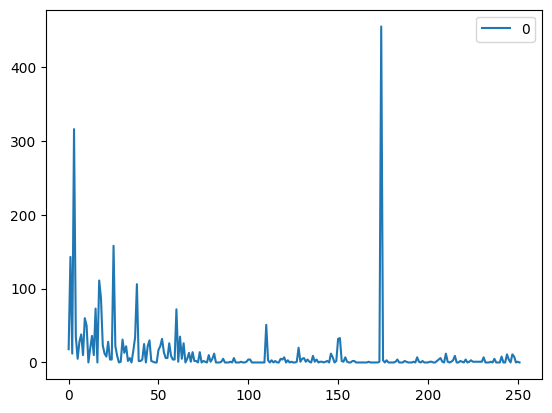

In [263]:
b.plot()

In [269]:
b.index

,0
0,18
1,143
2,12
3,316
4,35
...,...
247,11
248,8
249,0
250,1


In [272]:
index_P = b[b[0]>=20].index
index_P

Int64Index([  1,   3,   4,   6,   7,   9,  10,  13,  15,  17,  18,  19,  22,
             25,  26,  30,  32,  37,  38,  42,  44,  45,  51,  52,  56,  60,
             62,  64, 110, 128, 150, 151, 174],
           dtype='int64')

In [251]:
k=a[0][0]>=0.05
k.tolist().count([False])

1776

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1794, 1)

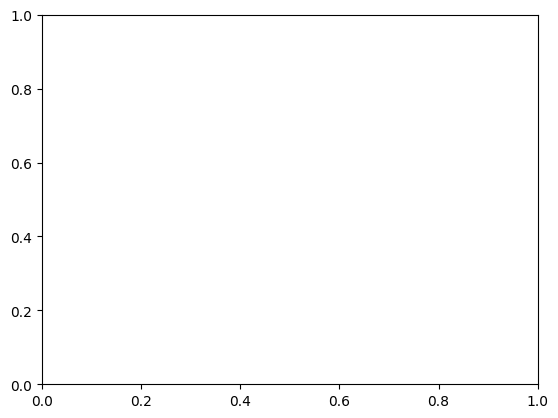

In [273]:
plt.plot(test_y[3], color='red', label='real SEC stock price')
plt.plot(pred_y[3], color='blue', label='predicted SEC stock price')

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1794, 1)

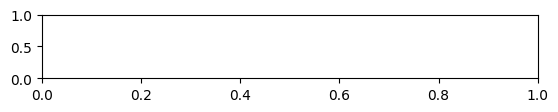

In [274]:
plt.figure()
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(test_y[i+10], color='red', label='real SEC stock price')
    plt.plot(pred_y[i+10], color='blue', label='predicted SEC stock price')
    plt.xlabel('time')
    plt.ylabel('stock price')




plt.show()

In [ ]:
for i in range()